# 📬 Enviando el mail
Actualizado: Mayo 2023

## Pasos para generar la clave:

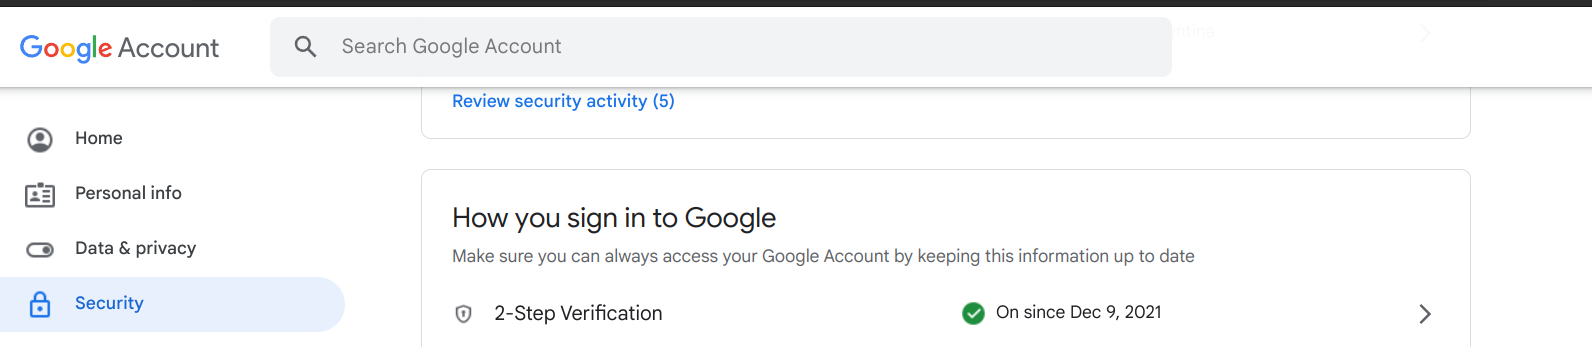

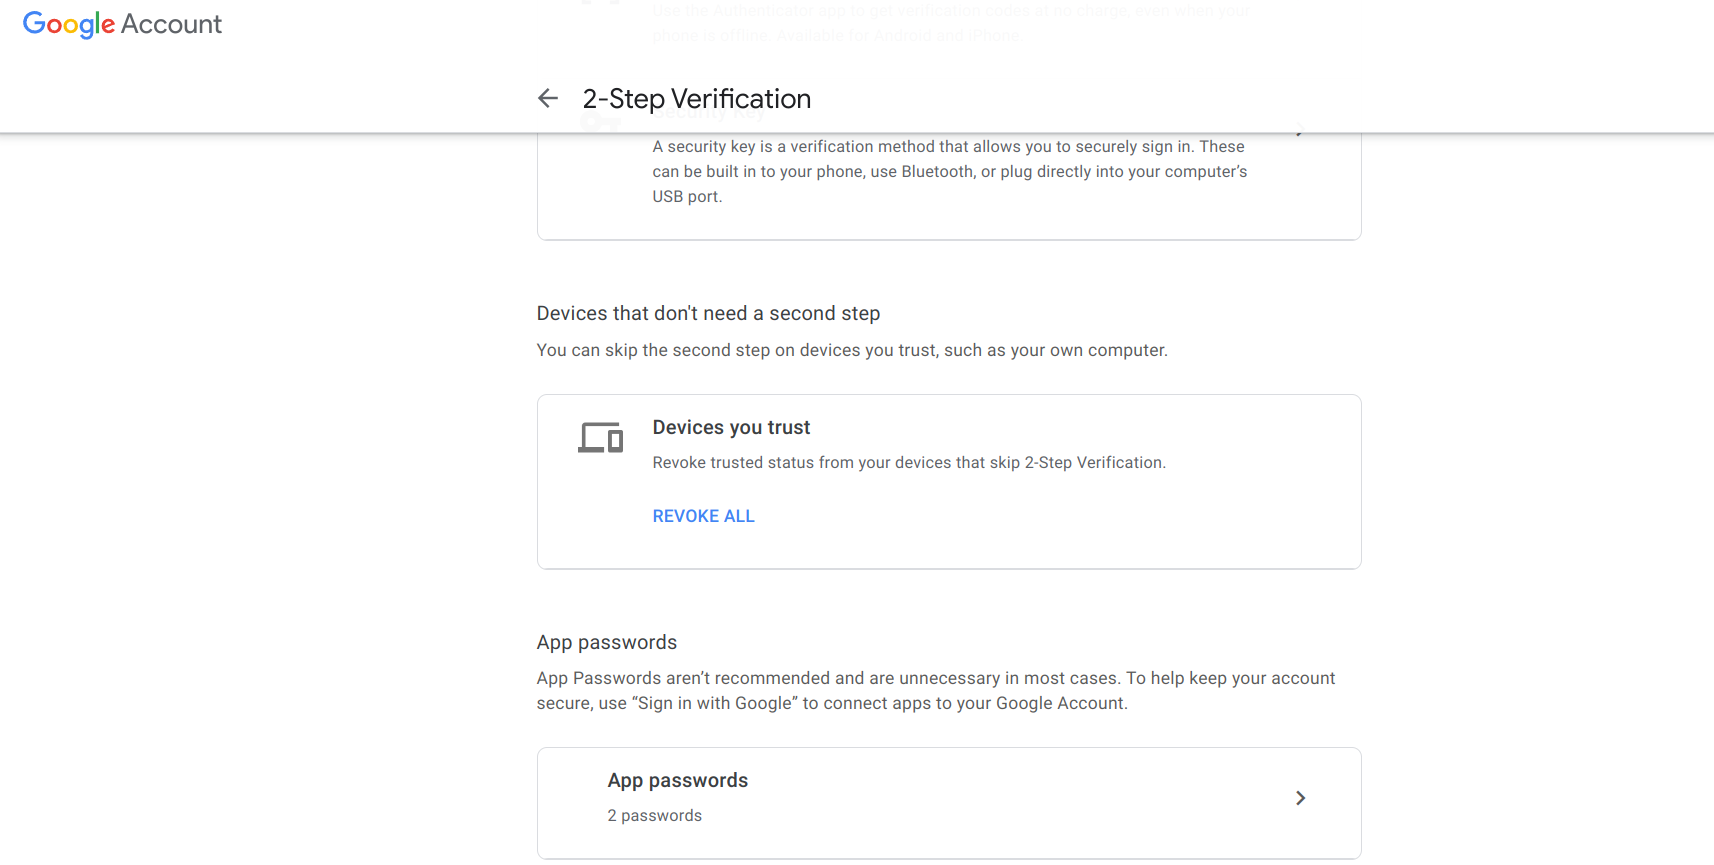

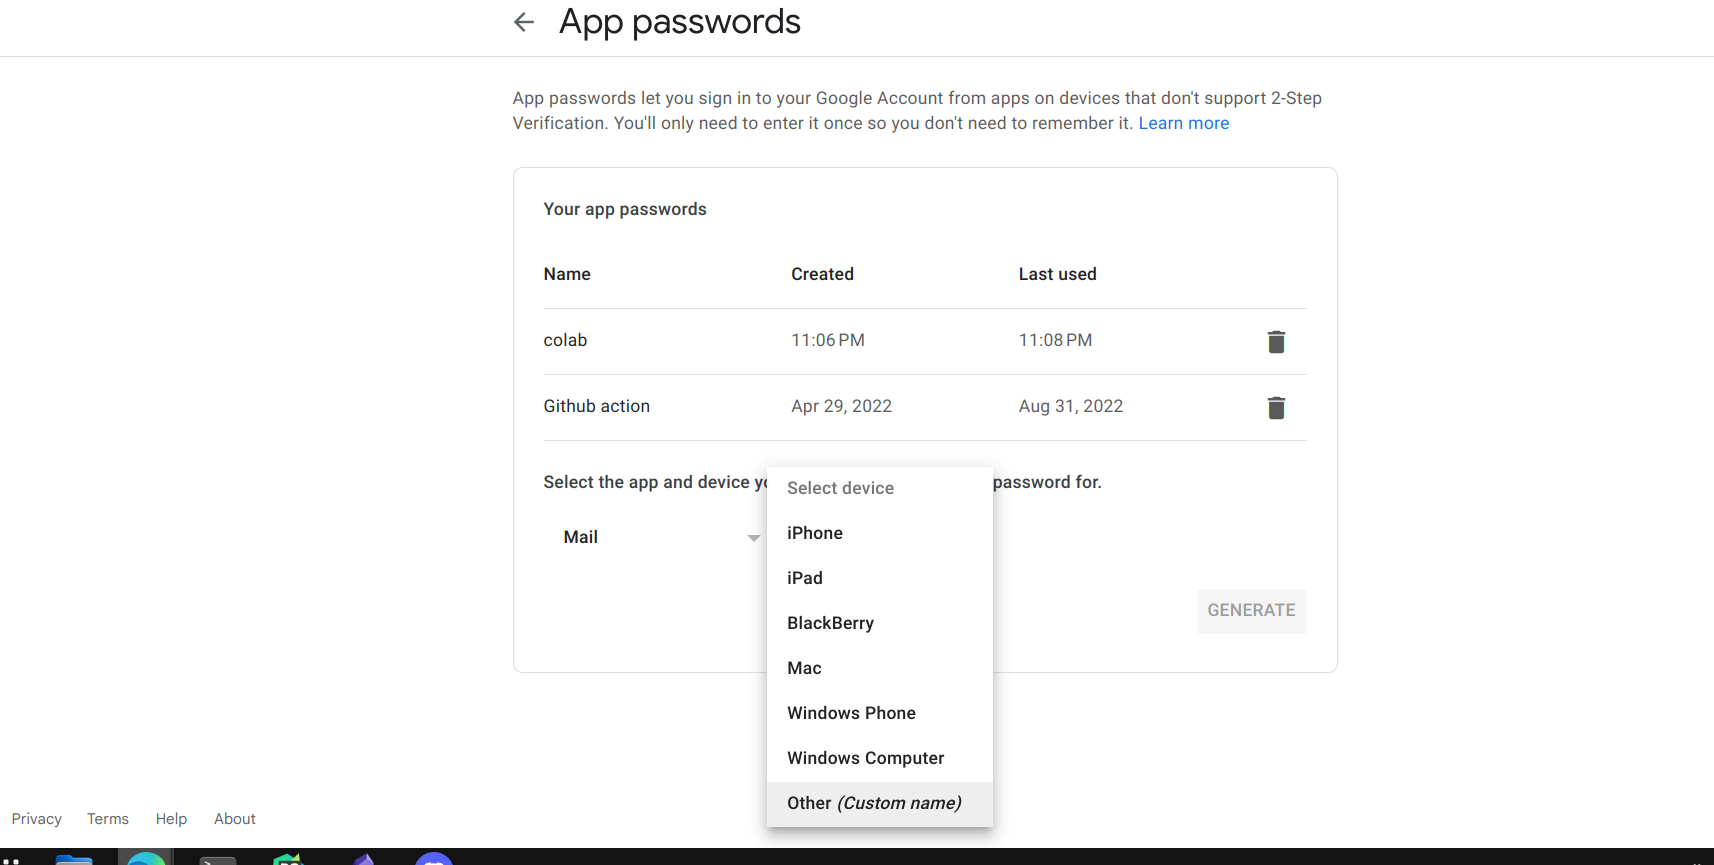

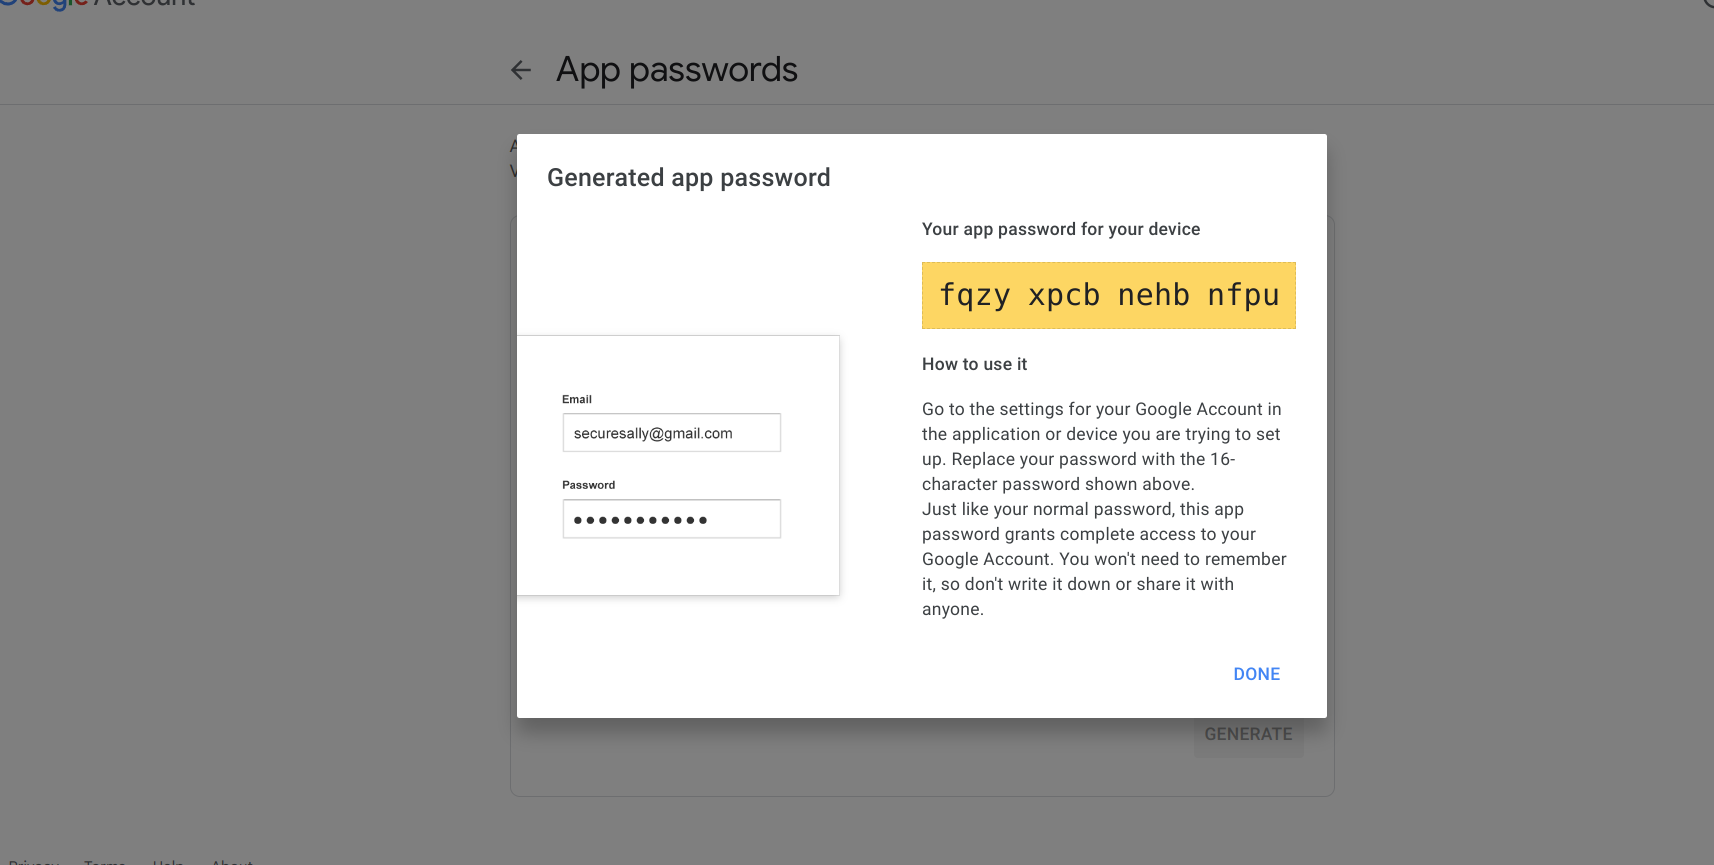

## Codigo para enviar el mail (basico)

In [ ]:
import os
import smtplib
from email.message import EmailMessage

user_gmail = os.getenv('USER_GMAIL')
password_gmail = ""

def send_notifying_mail(mail_user: str = "", mail_password: str = "") -> None:
    # aqui va tu codigo
    ...

send_notifying_mail(user_gmail, password_gmail)

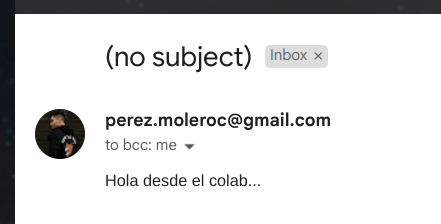

# 🚚 Algunas maneras de deployar mi automatizacion gratis
Actualizado: Mayo 2023

https://www.pythonanywhere.com/ -> para un interactivo (bot)


---
[github actions](https://github.com/engcarlosperezmolero/tus_clases_automatic_response_scraper) -> para un croneado

[limites de uso github actions](https://docs.github.com/en/actions/learn-github-actions/usage-limits-billing-and-administration#usage-limits)


[otro ejemplo github actions (explicativo)](https://github.com/jsoma/selenium-github-actions/tree/main)

[otro ejemplo](https://github.com/buore/selenium_python_tutorial/blob/main/.github/workflows/python-app.yml)

[ejemplo sin selenium en el cual se va acumulando data en otro repo](https://github.com/simonw/pge-outages)

[un ejemplo escribiendo al mismo repo](https://github.com/simonw/ca-fires-history/blob/main/.github/workflows/scrape.yml)

### Un ejemplo de un github actions que envia un correo cada 3 horas:

```yaml
name: Enviar correo

on:
  workflow_dispatch:

jobs:
  build:
    runs-on: ubuntu-latest
    steps:
    - name: Checkout
      uses: actions/checkout@v3

    - name: Configuración del entorno Python
      uses: actions/setup-python@v2
      with:
        python-version: '3.10'

    - name: Instalar dependencias
      run: | # aqui puedes instalar usando el requirements.txt
        python -m pip install --upgrade pip
        pip install pandas

    - name: Ejecutar script Python
      run: python3 enviar_mail.py
      env:
        USER_GMAIL: ${{ secrets.USER_GMAIL }}
        PASSWORD_GMAIL: ${{ secrets.PASSWORD_GMAIL }}
```

### Pasos para implementar el script:
- crear un repositorio publico de github
- crear el archivo `enviar_mail.py` que contenga el codigo de enviar el mail
    - las variables de usuario y contraseña deberan ser variables de entorno llamadas `USER_GMAIL` y `PASSWORD_GMAIL`.
    - al final del archivo colocar
        ```python
        if __name__ == "__main__":
            enviar_mail(usuario, contraseña) # modificar segun se llame tu funcion y parametros
        ```
- crear una carpeta llamada `.github` y adentro de esta crear otra carpeta llamada `workflows`, adentro de `workflows`  crear un archivo que se llame como quieras (sin espacio ni caracteres raros) que tenga extension `.yml`, por ejemplo `enviar_mail.yml`.
- adentro de `enviar_mail.yml` copiar el codigo de arriba.
- configurar los secretos del github actions en los ajustes del repositorio.
- ir a la pestaña de actions y correr manualmente el script
- si recibes el mail todo marcho bien y seguro lo recibes dentro de 3 horas tambien.


# Agilizando una automatizacion usando IA
Actualizado: Mayo 2023

### instalando las librerias necesarias

In [ ]:
%%bash
pip install pytesseract Pillow openai pandas
apt install tesseract-ocr

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 71.9/71.9 kB 3.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 25.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 114.5/114.5 kB 2.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 268.8/268.8 kB 10.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 149.6/149.6 kB 8.9 MB/s eta 0:00:00
Reading package lists...
Building dependency tree...
Reading state information...
The following additional packages will be installed:
  tesseract-ocr-eng tesseract-ocr-osd
The following NEW packages will be installed:
  tesseract-ocr tesseract-ocr-eng tesseract-ocr-osd
0 upgraded, 3 newly installed, 0 to remove and 24 not upgraded.
Need to get 4,850 kB of archives.
After this operation, 16.3 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu focal/universe amd64 t

### Importando el codigo necesario

In [ ]:
import re
import os
from io import StringIO

import pytesseract
from PIL import Image
import openai
import pandas as pd

### Usando el OCR para extraer el texto de la imagen del menu

In [ ]:
menu_image_name = 'page-1_29.jpg' # pedir esta imagen al profesor
image = Image.open(menu_image_name)
text = pytesseract.image_to_string(image)
print(text)

Biryani Dishes

‘These dishes are mixed with pilau rice and served with a delicious vegetable curry.

Biryani (Chicken, Lamb or Prawn) £8.95
Mushroom Biryani (Chicken, Lamb or Prawn) £9.45
Tikka Biryani (Chicken or Lamb) £9.95
Mixed Biryani (Chicken, Lamb & Prawns) £11.95
Tandoori King Prawn Biryani £12.90
Vegetarian Biryani £7.95
Vegetable Sides Rice
Bombay Potato £4.20 Boiled Rice £2.55
Mushroom Bhaji apo; | PiaLBICe e2ae
Saag Bhaji Spinach £4.29 Coconut Rice £3.95
Bhindi Bhaji £4.20 Keema Rice With mincedmeat £3.95
Vegetable Rice £3.75

Tarka Dall Lentils with garlic £4.20

Saag Paneer Spinach &cheese £4.50 Almond Rice 5
Mixed Vegetables ~~ “receee &x86
Cauliflower Bhaji sa2q Fag Fried Rice —
Brinjal Bhaji Aubergine Fea, occ area hice oe

Other Special Rice £4.50

Aloo Gobi Potato & cauliflower £4.50
Saag Aloo Potato & spinach £4.50
ChanaMasala cricksess © £450 ‘SAUCES

 

Curry Sauce £4.90
ees Vindaloo Sauce £4.90
Potatoes & spinach cooked Masala Sauce £5.90
Wh sidan Madras Sauce £

### Inicializando la API de open ai

In [ ]:
# @title Coloca tu OPENAI API KEY
OPENAI_API_KEY = ""

In [ ]:
openai.api_key = OPENAI_API_KEY

def ask_prompt_gpt(prompt):
    """
    https://platform.openai.com/docs/api-reference/completions/create
    """
    completion = openai.ChatCompletion.create(
    model="gpt-3.5-turbo",
    messages=[
    {"role": "user", "content": prompt}
    ]
    )
    return completion.choices[0].message.content

### Creando el prompt (cambiar segun el idioma del menu)

In [ ]:
prompt_image = f"Recognise text's language and do your task only considering that language. Organize the following text representing a restaurant menu in a table format with appropriate columns, such as category (don't group it, make explicit values for each row), dish name, description, price (these may or may not be variables), and any other relevant information that may be present on the menu. Note that the format and content of the menu may vary, but they are all restaurant menus. Here is the menu provided: {text}"
#prompt_image = f"Organice el siguiente texto que representa el menú de un restaurante en formato de tabla con las columnas adecuadas, como categoría, nombre del plato, descripción, precio (pueden ser variables o no) y cualquier otra información relevante que pueda estar presente en el menú. Tenga en cuenta que el formato y el contenido del menú pueden variar, pero todos son menús de restaurante. A continuación se muestra el menú proporcionado: {text}"
#prompt_image = f"Disporre il seguente testo che rappresenta il menu di un ristorante in formato tabella con colonne appropriate come la categoria, il nome del piatto, la descrizione, il prezzo (che può essere variabile o meno) e qualsiasi altra informazione pertinente che possa essere presente nel menu. Si noti che il formato e il contenuto del menu possono variare, ma si tratta di menu di ristoranti. Il menu fornito è riportato di seguito: {text}"

### Enviando el promt a gpt

In [ ]:
%%time
menu = ask_prompt_gpt(prompt_image)

CPU times: user 448 ms, sys: 72.1 ms, total: 520 ms
Wall time: 1min 28s


In [ ]:
menu

'| Category | Dish Name | Description | Price |\n| --- | --- | --- | --- |\n| Biryani Dishes | Biryani (Chicken, Lamb or Prawn) | Mixed with pilau rice and served with a delicious vegetable curry | £8.95 |\n| Biryani Dishes | Mushroom Biryani (Chicken, Lamb or Prawn) | Mixed with pilau rice and served with a delicious vegetable curry | £9.45 |\n| Biryani Dishes | Tikka Biryani (Chicken or Lamb) | Mixed with pilau rice and served with a delicious vegetable curry | £9.95 |\n| Biryani Dishes | Mixed Biryani (Chicken, Lamb & Prawns) | Mixed with pilau rice and served with a delicious vegetable curry | £11.95 |\n| Biryani Dishes | Tandoori King Prawn Biryani | Mixed with pilau rice and served with a delicious vegetable curry | £12.90 |\n| Biryani Dishes | Vegetarian Biryani | Mixed with pilau rice and served with a delicious vegetable curry | £7.95 |\n| Vegetable Sides | Bombay Potato | - | £4.20 |\n| Vegetable Sides | Boiled Rice | - | £2.55 |\n| Vegetable Sides | Mushroom Bhaji | - | £4.2

| Category | Dish Name | Description | Price |
| --- | --- | --- | --- |
| Biryani Dishes | Biryani (Chicken, Lamb or Prawn) | Mixed with pilau rice and served with a delicious vegetable curry | £8.95 |
| Biryani Dishes | Mushroom Biryani (Chicken, Lamb or Prawn) | Mixed with pilau rice and served with a delicious vegetable curry | £9.45 |
| Biryani Dishes | Tikka Biryani (Chicken or Lamb) | Mixed with pilau rice and served with a delicious vegetable curry | £9.95 |
| Biryani Dishes | Mixed Biryani (Chicken, Lamb & Prawns) | Mixed with pilau rice and served with a delicious vegetable curry | £11.95 |
| Biryani Dishes | Tandoori King Prawn Biryani | Mixed with pilau rice and served with a delicious vegetable curry | £12.90 |
| Biryani Dishes | Vegetarian Biryani | Mixed with pilau rice and served with a delicious vegetable curry | £7.95 |
| Vegetable Sides | Bombay Potato | - | £4.20 |
| Vegetable Sides | Boiled Rice | - | £2.55 |
| Vegetable Sides | Mushroom Bhaji | - | £4.29 |
| Vegetable Sides | Saag Bhaji Spinach | - | £4.29 |
| Vegetable Sides | Coconut Rice | - | £3.95 |
| Vegetable Sides | Bhindi Bhaji | - | £4.20 |
| Vegetable Sides | Keema Rice | With minced meat | £3.95 |
| Vegetable Sides | Vegetable Rice | - | £3.75 |
| Vegetable Sides | Tarka Dall | Lentils with garlic | £4.20 |
| Vegetable Sides | Saag Paneer | Spinach & cheese | £4.50 |
| Vegetable Sides | Almond Rice | - | £5 |
| Vegetable Sides | Mixed Vegetables | - | £4.86 |
| Vegetable Sides | Cauliflower Bhaji | - | £3.95 |
| Vegetable Sides | Fag Fried Rice | - | £2.55 |
| Vegetable Sides | Brinjal Bhaji | Aubergine | - | £4.20 |
| Vegetable Sides | Other Special Rice | - | £4.50 |
| Vegetable Sides | Aloo Gobi | Potato & cauliflower | £4.50 |
| Vegetable Sides | Saag Aloo | Potato & spinach | £4.50 |
| Vegetable Sides | Chana Masala | - | £4.50 |
| Sauces | Curry Sauce | - | £4.90 |
| Sauces | Vindaloo Sauce | - | £4.90 |
| Sauces | Masala Sauce | - | £5.90 |
| Sauces | Madras Sauce | - | £4.90 |
| Sauces | Tomato & Garlic Tadka | - | £4.90 |
| Sauces | Dansak Sauce | - | £4.90 |
| Sundries | Plain Papadom | - | £0.65 |
| Sundries | Spicy Papadom | - | £0.65 |
| Sundries | Courgettes and carrots stir-fried | - | £3.50 |
| Sundries | Onion Raita | - | £2.90 |
| Sundries | Cucumber Raita | - | £2.90 |
| Sundries | Onion Salad | - | £0.65 |
| Sundries | Mango Steen Salad | - | £4.20 |
| Sundries | Mint Sauce | - | £0.65 |
| Sundries | Peshwari Naan | Coconut | £3.20 |
| Sundries | Keema Naan | With minced meat | £3.80 |
| Sundries | Vegetable Naan | - | £3.50 |
| Sundries | Cheese Naan | - | £3.80 |
| Sundries | Paratha | - | £3.20 |
| Sundries | Stuffed Paratha | Veg or Lamb | £3.80 |
| Sundries | Chapatti | - | £2.40 |
| Sundries | Butter Chapatti | - | £2.50 |
| Sundries | Puri | Fried bread | £1.90 |
| Sundries | Honey Glazed Chilli Naan | - | £3.50 |
| Sundries | Ceri TRG UTE | - | £3.50 |
| Sundries | Cheese and Keema Naan | - | £3.80 |
| Drinks | Soft Drinks (1.5ltr) | - | £2.50 |
| Drinks | MineralWater | - | £2.00 |

In [ ]:
# @title la variable menu_text tiene la respuesta de gpt, asi evitamos usar tanto la api
menu_text = '''
| Category | Dish Name | Description | Price |
| --- | --- | --- | --- |
| Biryani Dishes | Biryani (Chicken, Lamb or Prawn) | Mixed with pilau rice and served with a delicious vegetable curry | £8.95 |
| Biryani Dishes | Mushroom Biryani (Chicken, Lamb or Prawn) | Mixed with pilau rice and served with a delicious vegetable curry | £9.45 |
| Biryani Dishes | Tikka Biryani (Chicken or Lamb) | Mixed with pilau rice and served with a delicious vegetable curry | £9.95 |
| Biryani Dishes | Mixed Biryani (Chicken, Lamb & Prawns) | Mixed with pilau rice and served with a delicious vegetable curry | £11.95 |
| Biryani Dishes | Tandoori King Prawn Biryani | Mixed with pilau rice and served with a delicious vegetable curry | £12.90 |
| Biryani Dishes | Vegetarian Biryani | Mixed with pilau rice and served with a delicious vegetable curry | £7.95 |
| Vegetable Sides | Bombay Potato | - | £4.20 |
| Vegetable Sides | Boiled Rice | - | £2.55 |
| Vegetable Sides | Mushroom Bhaji | - | £4.29 |
| Vegetable Sides | Saag Bhaji Spinach | - | £4.29 |
| Vegetable Sides | Coconut Rice | - | £3.95 |
| Vegetable Sides | Bhindi Bhaji | - | £4.20 |
| Vegetable Sides | Keema Rice | With minced meat | £3.95 |
| Vegetable Sides | Vegetable Rice | - | £3.75 |
| Vegetable Sides | Tarka Dall | Lentils with garlic | £4.20 |
| Vegetable Sides | Saag Paneer | Spinach & cheese | £4.50 |
| Vegetable Sides | Almond Rice | - | £5 |
| Vegetable Sides | Mixed Vegetables | - | £4.86 |
| Vegetable Sides | Cauliflower Bhaji | - | £3.95 |
| Vegetable Sides | Fag Fried Rice | - | £2.55 |
| Vegetable Sides | Brinjal Bhaji | Aubergine | - | £4.20 |
| Vegetable Sides | Other Special Rice | - | £4.50 |
| Vegetable Sides | Aloo Gobi | Potato & cauliflower | £4.50 |
| Vegetable Sides | Saag Aloo | Potato & spinach | £4.50 |
| Vegetable Sides | Chana Masala | - | £4.50 |
| Sauces | Curry Sauce | - | £4.90 |
| Sauces | Vindaloo Sauce | - | £4.90 |
| Sauces | Masala Sauce | - | £5.90 |
| Sauces | Madras Sauce | - | £4.90 |
| Sauces | Tomato & Garlic Tadka | - | £4.90 |
| Sauces | Dansak Sauce | - | £4.90 |
| Sundries | Plain Papadom | - | £0.65 |
| Sundries | Spicy Papadom | - | £0.65 |
| Sundries | Courgettes and carrots stir-fried | - | £3.50 |
| Sundries | Onion Raita | - | £2.90 |
| Sundries | Cucumber Raita | - | £2.90 |
| Sundries | Onion Salad | - | £0.65 |
| Sundries | Mango Steen Salad | - | £4.20 |
| Sundries | Mint Sauce | - | £0.65 |
| Sundries | Peshwari Naan | Coconut | £3.20 |
| Sundries | Keema Naan | With minced meat | £3.80 |
| Sundries | Vegetable Naan | - | £3.50 |
| Sundries | Cheese Naan | - | £3.80 |
| Sundries | Paratha | - | £3.20 |
| Sundries | Stuffed Paratha | Veg or Lamb | £3.80 |
| Sundries | Chapatti | - | £2.40 |
| Sundries | Butter Chapatti | - | £2.50 |
| Sundries | Puri | Fried bread | £1.90 |
| Sundries | Honey Glazed Chilli Naan | - | £3.50 |
| Sundries | Ceri TRG UTE | - | £3.50 |
| Sundries | Cheese and Keema Naan | - | £3.80 |
| Drinks | Soft Drinks (1.5ltr) | - | £2.50 |
| Drinks | MineralWater | - | £2.00 |
'''

### Preprocesando la respuesta de gpt

In [ ]:
lines = menu_text.split('\n')
lines = [line[1:-2] for line in lines if "---|---" not in line.replace(' ', '') or line.replace(' ', '') == '' ]
menu_text_preprocessed = '\n'.join(lines)

### creando el dataframe a partir de la respuesta preprocesada

In [ ]:
data = StringIO(menu_text_preprocessed)
df = pd.read_table(data, sep="|", on_bad_lines='skip')

### limpiando el dataframe

In [ ]:
df.columns = df.columns.str.strip().str.lower().str.replace(" ", "_")
text_columns = df.select_dtypes(include=['object']).columns
df[text_columns] = df[text_columns].apply(lambda x: x.str.strip())
CURRENCY_UNIT = '£'
df.price = pd.to_numeric(df.price.str.replace(CURRENCY_UNIT, ''), errors='coerce')
df['currency_unit'] = CURRENCY_UNIT

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52 entries, 0 to 51
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   category       52 non-null     object 
 1   dish_name      52 non-null     object 
 2   description    52 non-null     object 
 3   price          52 non-null     float64
 4   currency_unit  52 non-null     object 
dtypes: float64(1), object(4)
memory usage: 2.2+ KB


In [ ]:
df.category.value_counts()

Sundries           20
Vegetable Sides    18
Biryani Dishes      6
Sauces              6
Drinks              2
Name: category, dtype: int64

### exportando la data como un csv

In [ ]:
df.to_csv('menu_as_table.csv', index=False)

In [ ]:
df